In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd

from nbsnapshot import compare
from nbsnapshot.exceptions import SnapshotTestFailure

In [2]:
def create_fake_history(mean):
    """Creates a fake notebook history
    """
    history = [dict(metric=x) for x in np.random.normal(loc=mean, size=50)]
    _ = Path('normal.json').write_text(json.dumps(history))

def plot_history():
    """Plots records stored in notebook history
    """
    history = pd.read_json('normal.json')
    history['metric'].plot(kind='density')

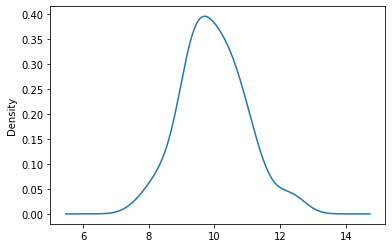

In [3]:
create_fake_history(mean=10)
plot_history()

In [4]:
try:
    compare.main('normal.ipynb', run=True)
except SnapshotTestFailure as e:
    print(e)

Running notebook...
Testing: 'metric' - OK!


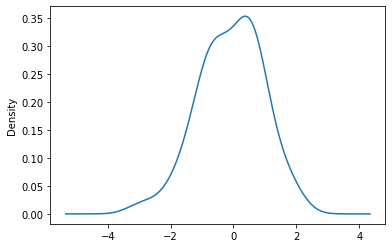

In [5]:
create_fake_history(mean=0)
plot_history()

In [6]:
try:
    compare.main('normal.ipynb', run=True)
except SnapshotTestFailure as e:
    print(e)

Running notebook...
Testing 'metric' - FAIL! Value is too high (10), expected one between -3.12 and 2.94
Some tests failed.
